<a href="https://colab.research.google.com/github/Deolinda1506/Beats_Externship/blob/main/Copy_of_deolinda_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Initial EDA with Pandas:

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving updated_dataset.csv to updated_dataset.csv


In [ ]:

import pandas as pd

# Load the cleaned dataset
df_reviews = pd.read_csv('updated_dataset.csv',index_col=0)

# Verify the data
print(df_reviews.head())

                 review_id  product_id  \
Unnamed: 0                               
0            RUE030N50F9EJ  B09PYVXXW5   
1           R385JSD6KWP2QU  B09PYVXXW5   
2           R1UB1V4EPP9MN3  B09PYVXXW5   
3            RWYK1GXIVV6H1  B09PYVXXW5   
4           R3FBQBGQM3II4W  B09PYVXXW5   

                                                        title    author  \
Unnamed: 0                                                                
0           5.0 out of 5 stars Really good with a couple o...       CTM   
1           4.0 out of 5 stars I wish I could rate 5 stars...    Gianna   
2           5.0 out of 5 stars Basically perfect, fantasti...  Colin M.   
3                     1.0 out of 5 stars Decent but Defective    Aquila   
4            3.0 out of 5 stars I went with soundcore instead   Frankie   

            rating                                            content  \
Unnamed: 0                                                              
0                5  I love TWS ea

In [ ]:

# Display summary of the dataset
print("\nDataset summary:")
print(df_reviews.info())


Dataset summary:
<class 'pandas.core.frame.DataFrame'>
Index: 4945 entries, 0 to 5892
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           4945 non-null   object
 1   product_id          4945 non-null   object
 2   title               4945 non-null   object
 3   author              4944 non-null   object
 4   rating              4945 non-null   int64 
 5   content             4937 non-null   object
 6   timestamp           4945 non-null   object
 7   profile_id          4945 non-null   object
 8   is_verified         4945 non-null   int64 
 9   helpful_count       4945 non-null   int64 
 10  product_attributes  4721 non-null   object
 11  product_name        1182 non-null   object
dtypes: int64(3), object(9)
memory usage: 502.2+ KB
None


In [ ]:

# Provide descriptive statistics
print("\nDescriptive statistics:")
print(df_reviews.describe(include='all'))


Descriptive statistics:
             review_id  product_id                           title  \
count             4945        4945                            4945   
unique            4735          54                            4148   
top     R2TT1UU35P8I2W  B096SV8SJG  5.0 out of 5 stars Great sound   
freq                 3         123                              44   
mean               NaN         NaN                             NaN   
std                NaN         NaN                             NaN   
min                NaN         NaN                             NaN   
25%                NaN         NaN                             NaN   
50%                NaN         NaN                             NaN   
75%                NaN         NaN                             NaN   
max                NaN         NaN                             NaN   

                 author       rating content  \
count              4944  4945.000000    4937   
unique             4133          NaN  

In [ ]:

# Summary statistics for numerical variables
numerical_summary = df_reviews.describe()
print("Numerical Summary:")
print(numerical_summary)

Numerical Summary:
            rating  is_verified  helpful_count
count  4945.000000  4945.000000    4945.000000
mean      4.291203     0.937715       6.016178
std       1.064341     0.241697      61.418913
min       1.000000     0.000000       0.000000
25%       4.000000     1.000000       0.000000
50%       5.000000     1.000000       0.000000
75%       5.000000     1.000000       1.000000
max       5.000000     1.000000    2284.000000


In [ ]:
# Verify that missing values are handled
missing_values = df_reviews.isnull().sum()
print(missing_values)

review_id                0
product_id               0
title                    0
author                   1
rating                   0
content                  8
timestamp                0
profile_id               0
is_verified              0
helpful_count            0
product_attributes     224
product_name          3763
dtype: int64


Handling Missing Values

In [ ]:
df_reviews = df_reviews.dropna(subset=['author', 'content'])


In [ ]:
# Verify that missing values are handled
missing_values = df_reviews.isnull().sum()
print(missing_values)

review_id                0
product_id               0
title                    0
author                   0
rating                   0
content                  0
timestamp                0
profile_id               0
is_verified              0
helpful_count            0
product_attributes     223
product_name          3758
dtype: int64


In [ ]:

# Verify that duplicates are removed
duplicates_after = df_reviews.duplicated().sum()
print(f"\nNumber of duplicate rows after removal: {duplicates_after}")


Number of duplicate rows after removal: 0


Frequency Distribution of Categorical Variables:



In [ ]:
categorical_columns = ['product_name', 'author', 'product_attributes']
for column in categorical_columns:
    frequency = df_reviews[column].value_counts()
    print(f"Frequency distribution for {column}:")
    print(frequency)
    print("\n")


Frequency distribution for product_name:
product_name
Beats Studio Buds - True Wireless Noise Cancelling Earbuds                123
Sennheiser CX True Wireless Earbuds                                       101
1MORE ComfoBuds Mini Hybrid Active Noise Cancelling Earbuds               100
HTC Wireless Headphones                                                   100
JLab Go Air Pop True Wireless Bluetooth Earbuds                           100
Jabra Elite 4 True Wireless Earbuds                                       100
Skullcandy Smokin Buds In-Ear Wireless Earbuds                            100
Soundcore by Anker Life P3 Noise Cancelling Wireless Bluetooth Earbuds    100
Bose SoundLink Flex Bluetooth Speaker                                     100
Sony WF-C700N Truly Wireless Noise Canceling Earbuds                       99
JBL Tune 230NC TWS                                                         98
Beats Pill (2024 Release) Portable Bluetooth Speaker                       57
Name: coun

Feature Engineering
Adding a new column that contains the total number of words in the content column

In [ ]:

# Function to count the number of words in a text
def count_words(text):
    return len(text.split())

# Apply the function to the content column and create a new column
df_reviews['word_count'] = df_reviews['content'].apply(count_words)

# Preview the dataset with the new word_count column
print(df_reviews[['content', 'word_count']].head())

                                                      content  word_count
Unnamed: 0                                                               
0           I love TWS earbuds. I have many including buds...         410
1           …I just can’t. Because as useful as these earb...         657
2           I needed a replacement for my Galaxy buds pro'...         579
3           UPDATE 6/24/22: As of 6/23/22, my replacement ...         578
4           So out of the box these tiny buds surprised me...         276


In [ ]:
# Check the first few rows to ensure the word count is correct
print(df_reviews[['content', 'word_count']].head())

# Get some descriptive statistics about the word counts
print("\nDescriptive statistics of word counts:")
print(df_reviews['word_count'].describe())

                                                      content  word_count
Unnamed: 0                                                               
0           I love TWS earbuds. I have many including buds...         410
1           …I just can’t. Because as useful as these earb...         657
2           I needed a replacement for my Galaxy buds pro'...         579
3           UPDATE 6/24/22: As of 6/23/22, my replacement ...         578
4           So out of the box these tiny buds surprised me...         276

Descriptive statistics of word counts:
count    4936.000000
mean      105.320908
std       149.209342
min         1.000000
25%        22.000000
50%        53.000000
75%       126.000000
max      2172.000000
Name: word_count, dtype: float64


In [ ]:
# First, create a new column to categorize products into 'Earbuds' and 'Speakers'
df_reviews['product_category'] = df_reviews['product_id'].map({
    '1MORE ComfoBuds Mini': 'Earbuds',
    'HTC Wireless Headphones': 'Earbuds',
    'JBL Tune 230NC TWS': 'Earbuds',
    'JLab Go Air Pop': 'Earbuds',
    'Beats Studio Buds': 'Earbuds',
    'Jabra Elite 4': 'Earbuds',
    'Sennheiser CX True Wireless': 'Earbuds',
    'Skullcandy Smokin Buds': 'Earbuds',
    'Sony WF-C700N': 'Earbuds',
    'Soundcore Life P3': 'Earbuds',
    'Bose SoundLink Flex': 'Speakers',
    'Beats Pill': 'Speakers'
})


2.Data Visualization:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")


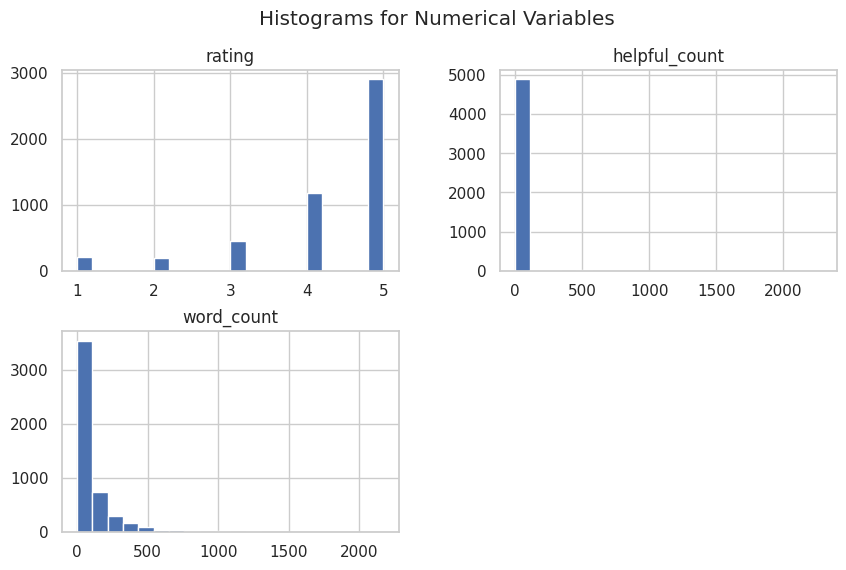

In [ ]:
# Histograms for numerical variables
df_reviews[['rating', 'helpful_count','word_count']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Histograms for Numerical Variables')
plt.show()

Visualizing the distribution of ratings using a count plot.



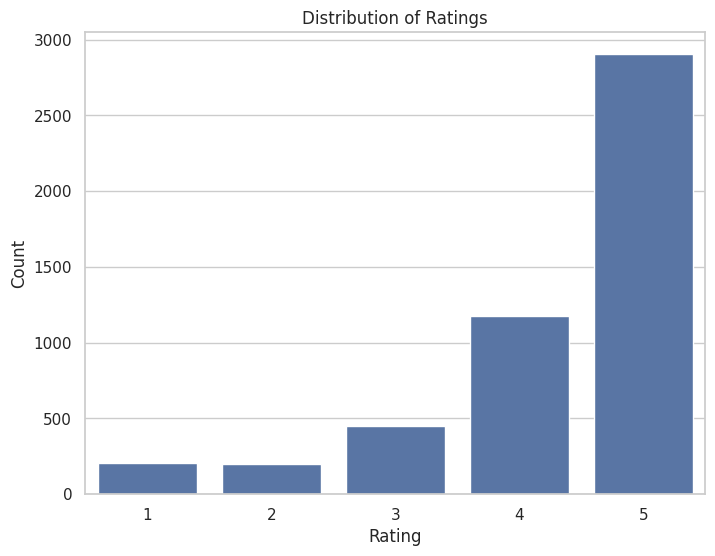

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_reviews)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

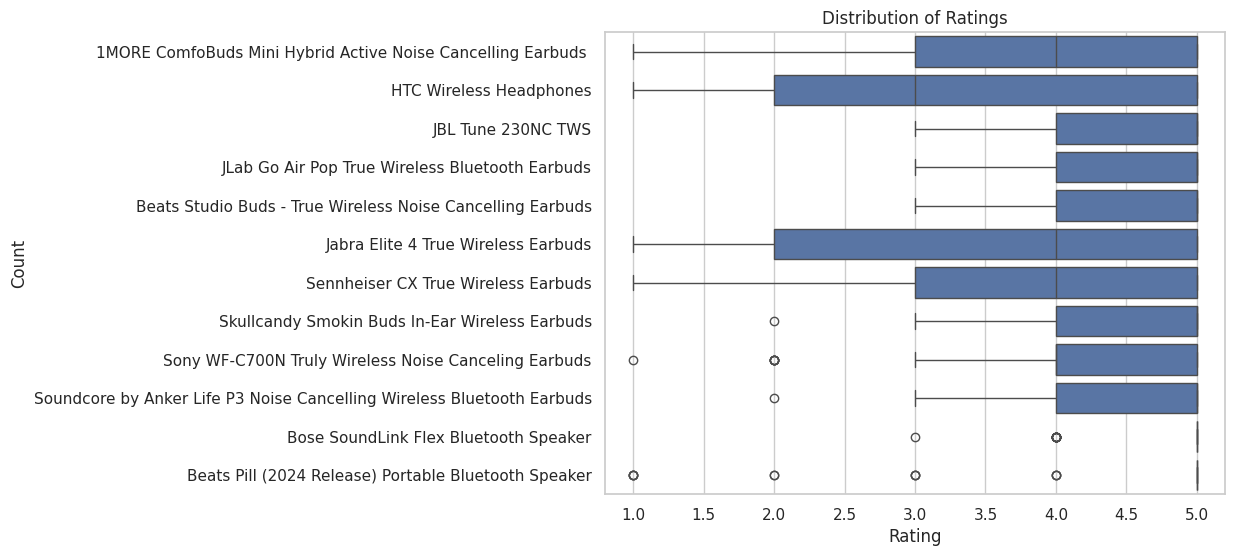

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', y='product_name', data=df_reviews)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

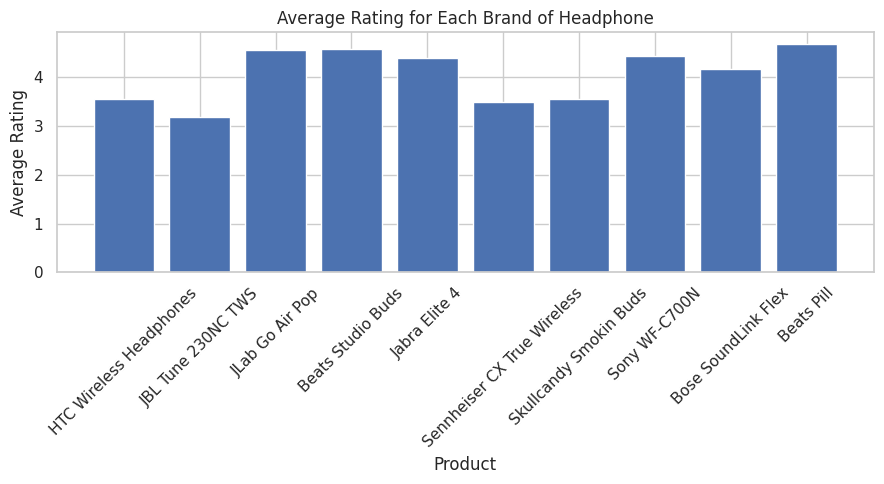

In [ ]:

# Initialize variables to store subset means
subset_means = []

# Calculate mean ratings for each subset of 100 rows
for start in range(0, 1000, 100):
    subset_df = df_reviews.iloc[start:start + 100]
    mean_rating = subset_df['rating'].mean()
    subset_means.append(mean_rating)

# Create categories for each subset
product_labels = ['HTC Wireless Headphones', 'JBL Tune 230NC TWS',
    'JLab Go Air Pop', 'Beats Studio Buds', 'Jabra Elite 4', 'Sennheiser CX True Wireless',
    'Skullcandy Smokin Buds', 'Sony WF-C700N',
    'Bose SoundLink Flex', 'Beats Pill']
# Create the bar chart
plt.figure(figsize=(9, 5))
plt.bar(product_labels, subset_means)
plt.title('Average Rating for Each Brand of Headphone')
plt.xlabel('Product')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Frequencies of each Rating for each Headphone

#HTC Wireless Headphones
subset_df = df.iloc[1:101]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for HTC Wireless Headphones')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#JBL Tune 230ONC TWS
subset_df = df.iloc[101:201]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for JBL Tune 230ONC TWS')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#jlab go Air Pop
subset_df = df.iloc[201:301]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for jlab go Air Pop')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Beats Studio Buds
subset_df = df.iloc[301:401]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Beats Studio Buds')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Jabra Elite 4
subset_df = df.iloc[401:501]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Jabra Elite 4')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#Sennheiser CX True Wireless
subset_df = df.iloc[501:601]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Sennheiser CX True Wireless')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Skullcandy Smokin Buds
subset_df = df.iloc[601:701]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Skullcandy Smokin Buds')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Bose SoundLink Flex
subset_df = df.iloc[701:801]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Bose SoundLink Flex')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Sony WF-C700N
subset_df = df.iloc[801:901]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Sony WF-C700N')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#Beats pill
subset_df = df.iloc[901:1000]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for Beats Pill')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

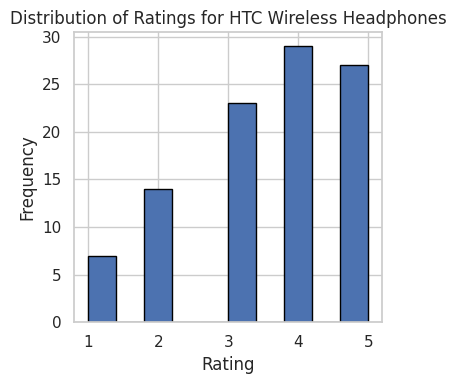

In [ ]:
#Frequencies of each Rating for each Headphone

# HTC Wireless Headphones
subset_df = df_reviews.iloc[1:101]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for HTC Wireless Headphones')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# JBL Tune 230NC TWS
subset_df = df.iloc[101:201]
plt.figure(figsize=(4, 4))
plt.hist(subset_df['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings for JBL Tune 230NC TWS')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

CORRELATION ANALYSIS



In [ ]:
# Calculate the correlation matrix only for numerical columns
correlation_matrix = df_reviews[['rating', 'helpful_count','word_count']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Covariance Analysis
covariance_matrix = df_reviews[['rating', 'helpful_count','word_count']].cov()
print("Covariance Matrix:")
print(covariance_matrix)

Correlation Matrix:
                 rating  helpful_count  word_count
rating         1.000000       0.005574   -0.113837
helpful_count  0.005574       1.000000    0.349650
word_count    -0.113837       0.349650    1.000000
Covariance Matrix:
                  rating  helpful_count    word_count
rating          1.132047       0.364596    -18.072167
helpful_count   0.364596    3779.098565   3207.182233
word_count    -18.072167    3207.182233  22263.427697


Correlation Matrix:
Rating and Helpful Count: The correlation between rating and helpful_count is 0.005574, indicating a very weak positive relationship. This suggests that there is almost no linear association between a review's rating and how helpful it is perceived to be.

Rating and Word Count: The correlation between rating and word_count is -0.113837, indicating a weak negative relationship. This implies that as the rating slightly increases, the word count tends to decrease a little, though the relationship is not strong.

Helpful Count and Word Count: The correlation between helpful_count and word_count is 0.349650, indicating a moderate positive relationship. This suggests that longer reviews are somewhat more likely to be marked as helpful.

Covariance Matrix:
Rating and Helpful Count: The covariance between rating and helpful_count is 0.364596, showing a weak positive association. This implies that as ratings slightly increase, helpful counts also tend to increase, though this relationship is minimal.

Rating and Word Count: The covariance between rating and word_count is -18.072167, indicating a weak negative association. This suggests that as ratings increase, the word count may slightly decrease.

Helpful Count and Word Count: The covariance between helpful_count and word_count is 3207.182233, indicating a stronger positive association. This suggests that as the word count increases, the helpful count tends to increase significantly, reflecting that longer reviews are often perceived as more helpful.

Variances:

The variance of rating is 1.132047, indicating a relatively low spread of rating values.
The variance of helpful_count is 3779.098565, showing a high spread in helpfulness counts across reviews.
The variance of word_count is 22263.427697, indicating a wide variation in the lengths of reviews.

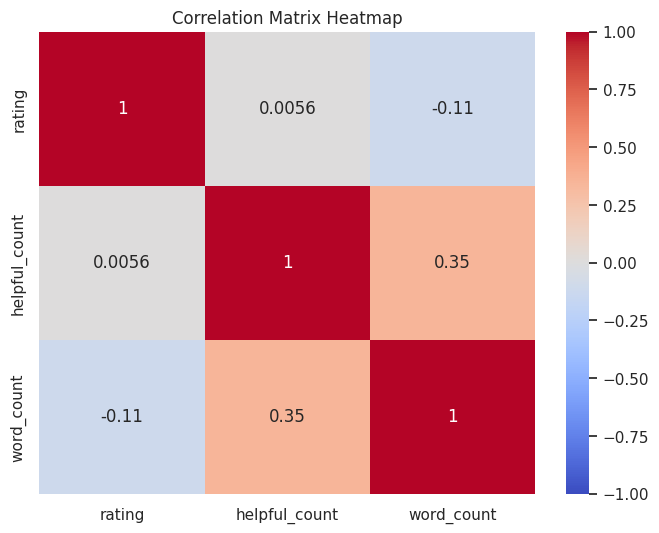

In [ ]:
# Correlation matrix
correlation_matrix = df_reviews[['rating', 'helpful_count','word_count']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


Product-wise Analysis:



In [ ]:
# Group by product and calculate mean rating and helpful_count
product_analysis = df_reviews.groupby('product_name').agg({
    'rating': 'mean',
    'helpful_count': 'mean',
    'is_verified': 'mean',
    'word_count': 'mean'
}).reset_index()

print("Product-wise Analysis:")
print(product_analysis)

Product-wise Analysis:
                                         product_name    rating  \
0   1MORE ComfoBuds Mini Hybrid Active Noise Cance...  3.550000   
1   Beats Pill (2024 Release) Portable Bluetooth S...  4.456140   
2   Beats Studio Buds - True Wireless Noise Cancel...  4.430894   
3               Bose SoundLink Flex Bluetooth Speaker  4.850000   
4                             HTC Wireless Headphones  3.180000   
5                                  JBL Tune 230NC TWS  4.551020   
6     JLab Go Air Pop True Wireless Bluetooth Earbuds  4.580000   
7                 Jabra Elite 4 True Wireless Earbuds  3.500000   
8                 Sennheiser CX True Wireless Earbuds  3.564356   
9      Skullcandy Smokin Buds In-Ear Wireless Earbuds  4.430000   
10  Sony WF-C700N Truly Wireless Noise Canceling E...  4.181818   
11  Soundcore by Anker Life P3 Noise Cancelling Wi...  4.680000   

    helpful_count  is_verified  word_count  
0        2.790000     1.000000  140.390000  
1        1.4736

Bar Plot for Product-wise Ratings:



<ipython-input-38-bf1ec81f6b28>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='product_name', data=product_analysis, palette='viridis')


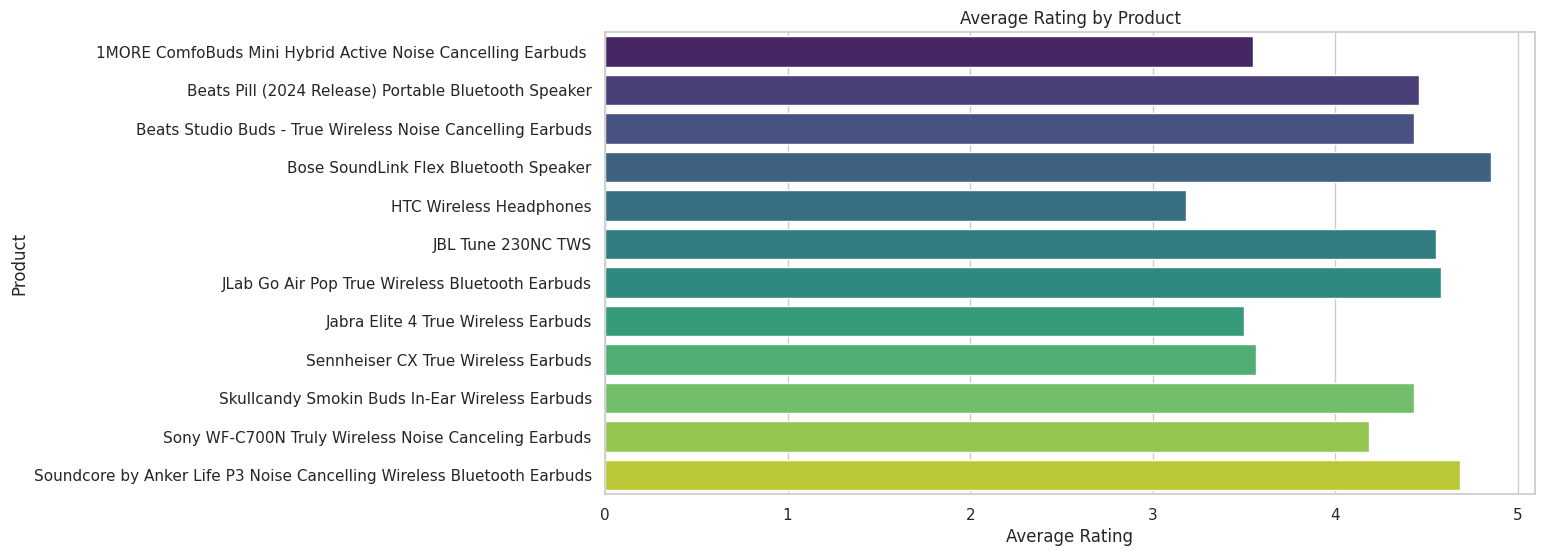

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for average rating by product
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='product_name', data=product_analysis, palette='viridis')
plt.title('Average Rating by Product')
plt.xlabel('Average Rating')
plt.ylabel('Product')
plt.show()

Sentiment Analysis


In [ ]:
from textblob import TextBlob

# Function to get the sentiment score
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the function to the content column
df_reviews['sentiment'] = df_reviews['content'].apply(get_sentiment)

# Classify the sentiment as positive, negative, or neutral
df_reviews['sentiment_category'] = df_reviews['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


Sentiment Distribution



In [ ]:
from textblob import TextBlob

# Function to get the sentiment score
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment analysis to the content of each review
df_reviews['sentiment_score'] = df_reviews['content'].apply(get_sentiment)

# Preview the dataset with the new sentiment_score column
print(df_reviews[['content', 'sentiment_score']].head())

# Define sentiment categories based on the sentiment score
df_reviews['sentiment_category'] = df_reviews['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

# Preview the sentiment categories
print(df_reviews[['content', 'sentiment_score', 'sentiment_category']].head())

# Calculate the overall average sentiment score
overall_sentiment_score = df_reviews['sentiment_score'].mean()
print(f"Overall Average Sentiment Score: {overall_sentiment_score}")

# Count the number of reviews in each sentiment category
sentiment_distribution = df_reviews['sentiment_category'].value_counts()
print("\nSentiment Category Distribution:")
print(sentiment_distribution)

                                                      content  sentiment_score
Unnamed: 0                                                                    
0           I love TWS earbuds. I have many including buds...         0.206449
1           …I just can’t. Because as useful as these earb...         0.135386
2           I needed a replacement for my Galaxy buds pro'...         0.182337
3           UPDATE 6/24/22: As of 6/23/22, my replacement ...         0.172517
4           So out of the box these tiny buds surprised me...         0.208679
                                                      content  \
Unnamed: 0                                                      
0           I love TWS earbuds. I have many including buds...   
1           …I just can’t. Because as useful as these earb...   
2           I needed a replacement for my Galaxy buds pro'...   
3           UPDATE 6/24/22: As of 6/23/22, my replacement ...   
4           So out of the box these tiny buds surprised m

<ipython-input-41-06d0bf710930>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df_reviews, palette='viridis')


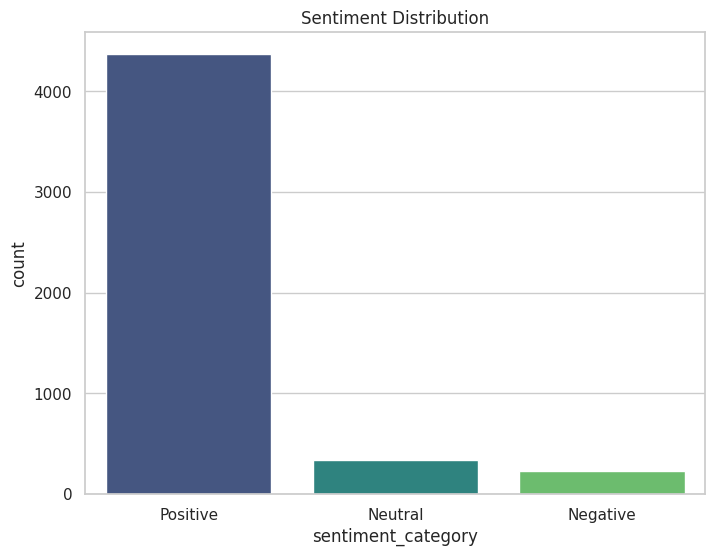

In [ ]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df_reviews, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

<ipython-input-54-659e44ca4556>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment_category', y='rating', data=df_reviews, palette='coolwarm')


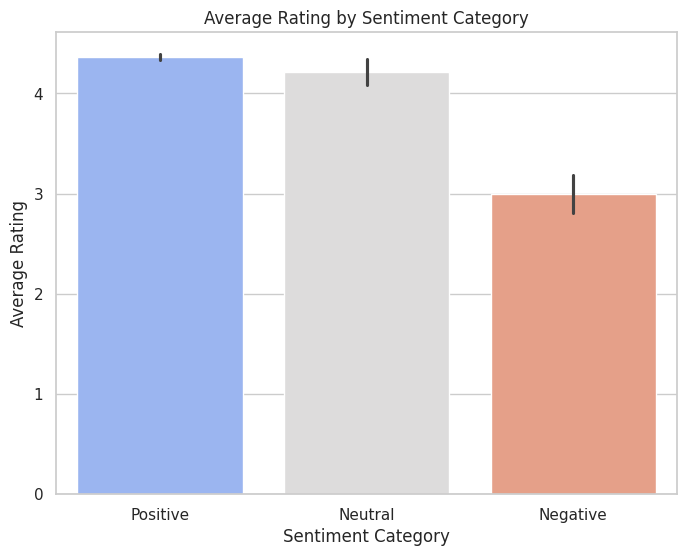

In [ ]:
# Bar plot for average rating by sentiment category
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment_category', y='rating', data=df_reviews, palette='coolwarm')
plt.title('Average Rating by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Rating')
plt.show()

Sentiment Analysis by Category



In [ ]:

# Now, let's calculate sentiment distribution for each category
earbuds_sentiment = df_reviews[df_reviews['product_category'] == 'Earbuds']['sentiment_category'].value_counts()
speakers_sentiment = df_reviews[df_reviews['product_category'] == 'Speakers']['sentiment_category'].value_counts()

print("Earbuds Sentiment Distribution:")
print(earbuds_sentiment)
print("Speakers Sentiment Distribution:")
print(speakers_sentiment)

Earbuds Sentiment Distribution:
Series([], Name: count, dtype: int64)
Speakers Sentiment Distribution:
Series([], Name: count, dtype: int64)


In [ ]:
df_reviews.head()


,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,word_count,product_category,sentiment,sentiment_category,sentiment_score
Unnamed: 0,,,,,,,,,,,,,,,,,
0,RUE030N50F9EJ,B09PYVXXW5,5.0 out of 5 stars Really good with a couple o...,CTM,5,I love TWS earbuds. I have many including buds...,"Reviewed in the United States May 14, 2022",AEGYSY5H3ZUJC4SGGPRM3Z2OE5PA,1,32,Color: Black,1MORE ComfoBuds Mini Hybrid Active Noise Cance...,410,NaN,0.206449,Positive,0.206449
1,R385JSD6KWP2QU,B09PYVXXW5,4.0 out of 5 stars I wish I could rate 5 stars...,Gianna,4,…I just can’t. Because as useful as these earb...,"Reviewed in the United States July 22, 2023",AHINA7A6O2I5RZSNAY4OWYN4QXVA,1,31,Color: Red,1MORE ComfoBuds Mini Hybrid Active Noise Cance...,657,NaN,0.135386,Positive,0.135386
2,R1UB1V4EPP9MN3,B09PYVXXW5,"5.0 out of 5 stars Basically perfect, fantasti...",Colin M.,5,I needed a replacement for my Galaxy buds pro'...,"Reviewed in the United States August 18, 2022",AFG2T5XGMQCACK7JBDRHKEKWJLPA,1,21,Color: Red,1MORE ComfoBuds Mini Hybrid Active Noise Cance...,579,NaN,0.182337,Positive,0.182337
3,RWYK1GXIVV6H1,B09PYVXXW5,1.0 out of 5 stars Decent but Defective,Aquila,1,"UPDATE 6/24/22: As of 6/23/22, my replacement ...","Reviewed in the United States June 3, 2022",AGFUWY2GO4HF5RMLUR7ZOSKID4KA,1,9,Color: Black,1MORE ComfoBuds Mini Hybrid Active Noise Cance...,578,NaN,0.172517,Positive,0.172517
4,R3FBQBGQM3II4W,B09PYVXXW5,3.0 out of 5 stars I went with soundcore instead,Frankie,3,So out of the box these tiny buds surprised me...,"Reviewed in the United States October 28, 2022",AEOFU2SCDWYLS6DTSXIR6FWMRQMQ,1,7,Color: Black,1MORE ComfoBuds Mini Hybrid Active Noise Cance...,276,NaN,0.208679,Positive,0.208679


In [ ]:
# Separating Beats products for sentiment comparison
beats_earbuds = df_reviews[(df_reviews['product_id'] == 'Beats Studio Buds - True Wireless Noise Canceling Earbuds') & (df_reviews['product_category'] == 'Earbuds')]
beats_speakers = df_reviews[(df_reviews['product_id'] == 'Beats Pill - Bluetooth Speaker') & (df_reviews['product_category'] == 'Speakers')]

# Calculate sentiment distribution for Beats products
beats_earbuds_sentiment = beats_earbuds['sentiment_category'].value_counts()
beats_speakers_sentiment = beats_speakers['sentiment_category'].value_counts()

# Compare with other brands in the same category
other_earbuds = df_reviews[(df_reviews['product_id'] != 'Beats Studio Buds - True Wireless Noise Canceling Earbuds') & (df_reviews['product_category'] == 'Earbuds')]
other_speakers = df_reviews[(df_reviews['product_id'] != 'Beats Pill - Bluetooth Speaker') & (df_reviews['product_category'] == 'Speakers')]

other_earbuds_sentiment = other_earbuds['sentiment_category'].value_counts()
other_speakers_sentiment = other_speakers['sentiment_category'].value_counts()

print("\nBeats Earbuds Sentiment Distribution:")
print(beats_earbuds_sentiment)
print("\nOther Earbuds Sentiment Distribution:")
print(other_earbuds_sentiment)

print("\nBeats Speakers Sentiment Distribution:")
print(beats_speakers_sentiment)
print("\nOther Speakers Sentiment Distribution:")
print(other_speakers_sentiment)


Beats Earbuds Sentiment Distribution:
Series([], Name: count, dtype: int64)

Other Earbuds Sentiment Distribution:
Series([], Name: count, dtype: int64)

Beats Speakers Sentiment Distribution:
Series([], Name: count, dtype: int64)

Other Speakers Sentiment Distribution:
Series([], Name: count, dtype: int64)


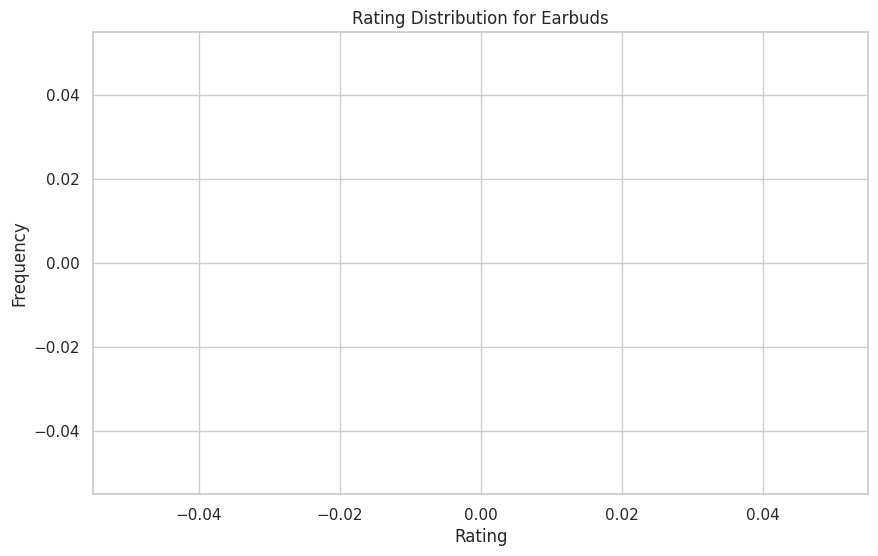

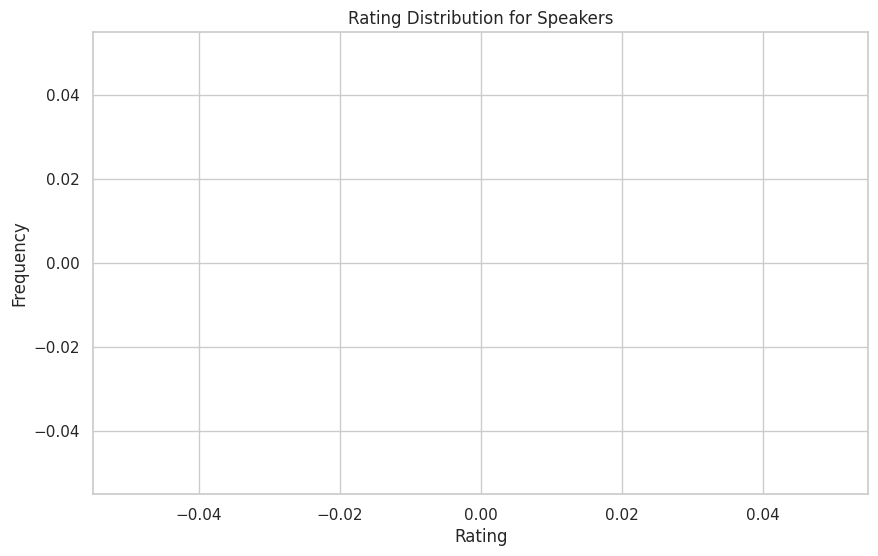

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot rating distribution for Earbuds
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews[df_reviews['product_category'] == 'Earbuds']['rating'], kde=True, bins=5)
plt.title('Rating Distribution for Earbuds')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plot rating distribution for Speakers
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews[df_reviews['product_category'] == 'Speakers']['rating'], kde=True, bins=5)
plt.title('Rating Distribution for Speakers')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:

# Analyze neutral and negative sentiments for Beats Studio Buds
beats_earbuds_neutral_negative = beats_earbuds[beats_earbuds['sentiment_category'].isin(['Neutral', 'Negative'])]
print("Beats Studio Buds - Neutral and Negative Reviews:")
print(beats_earbuds_neutral_negative[['rating', 'content']].head())

# Analyze neutral and negative sentiments for Beats Pill
beats_speakers_neutral_negative = beats_speakers[beats_speakers['sentiment_category'].isin(['Neutral', 'Negative'])]
print("\nBeats Pill - Neutral and Negative Reviews:")
print(beats_speakers_neutral_negative[['rating', 'content']].head())

Beats Studio Buds - Neutral and Negative Reviews:
Empty DataFrame
Columns: [rating, content]
Index: []

Beats Pill - Neutral and Negative Reviews:
Empty DataFrame
Columns: [rating, content]
Index: []


Creating a word cloud to visualize common words in the review text.



In [ ]:
# Word cloud of review text
from wordcloud import WordCloud

In [ ]:
# Combine all review text into a single string
all_reviews = ' '.join(df_reviews['content'].dropna())

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

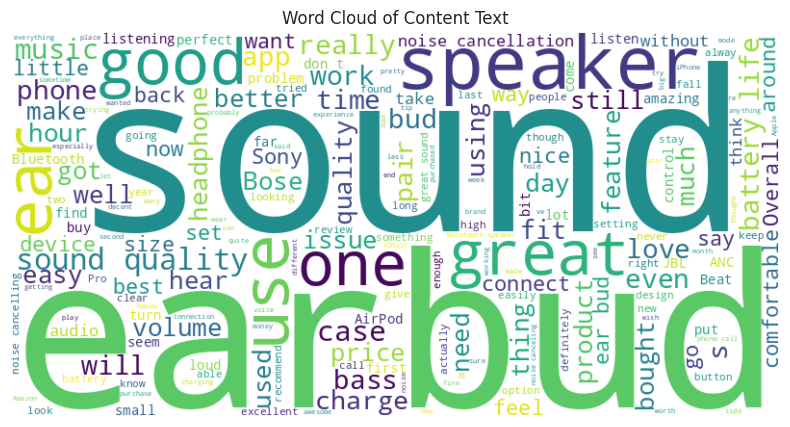

In [ ]:
# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content Text')
plt.show()


Text(0.5, 1.0, 'Word Cloud of Title Text')

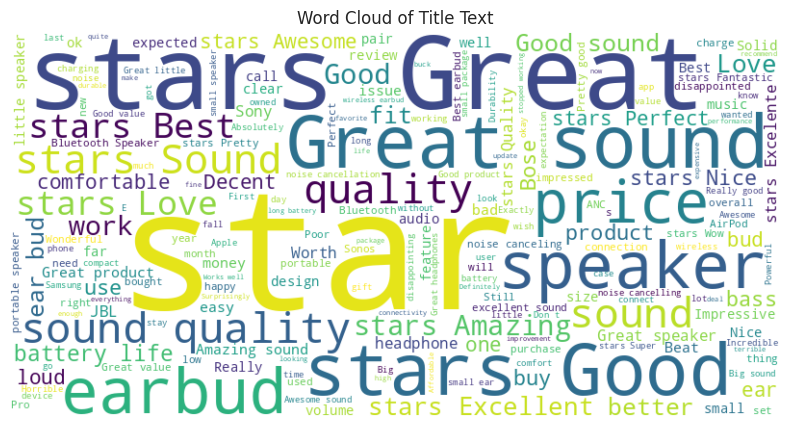

In [ ]:
all_titles = ' '.join(df_reviews['title'].dropna())
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Title Text')

Weighted Word Clouds for Product attributes



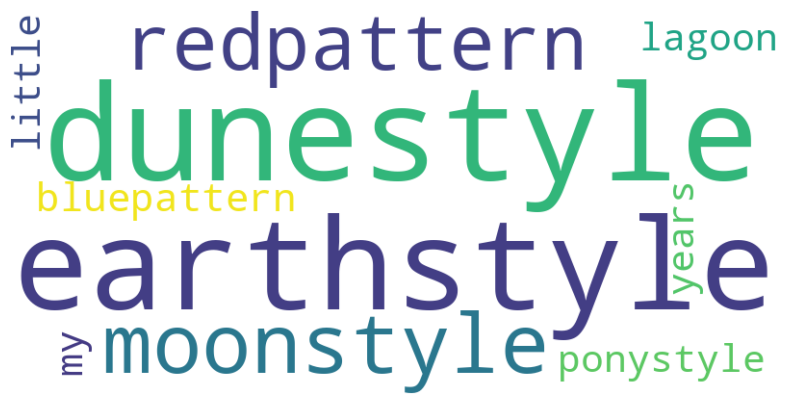

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert corpus elements to strings and handle missing values
corpus = [str(attribute) for attribute in df_reviews['product_attributes'] if pd.notna(attribute)]

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(corpus)
tfidf_scores = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=10, prefer_horizontal=0.7)
wordcloud.generate_from_frequencies(tfidf_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:

# Save the New columns DataFrame to a CSV file
df_reviews.to_csv('/content/modified_beats_reviews.csv', index=False)

Conclusion
